In [1]:
from google.colab import files
adfile=files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("movieticket.csv")

In [4]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [5]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [6]:
df.corr()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
film_code,1.000000,0.029530,0.009802,-0.005588,-0.000920,0.076670,-0.104120,0.104820,-0.005582,0.061224,0.851380,0.800933,-0.028686
cinema_code,0.029530,1.000000,-0.012910,-0.053716,0.019534,-0.187125,0.125542,0.005079,-0.053957,-0.353402,0.051027,0.049646,-0.000270
total_sales,0.009802,-0.012910,1.000000,0.915176,0.066810,0.509812,0.414418,0.272450,0.915112,0.376134,-0.080568,-0.051433,-0.000424
tickets_sold,-0.005588,-0.053716,0.915176,1.000000,0.071498,0.522088,0.493707,0.103596,0.999946,0.425468,-0.103477,-0.062666,-0.005037
tickets_out,-0.000920,0.019534,0.066810,0.071498,1.000000,0.078860,0.044407,0.011916,0.061091,0.037599,-0.012448,-0.007210,0.004441
show_time,0.076670,-0.187125,0.509812,0.522088,0.078860,1.000000,0.055617,0.176274,0.521625,0.681645,-0.023297,-0.020643,0.007646
occu_perc,-0.104120,0.125542,0.414418,0.493707,0.044407,0.055617,1.000000,0.084666,0.493585,-0.141262,-0.145100,-0.088856,-0.011061
ticket_price,0.104820,0.005079,0.272450,0.103596,0.011916,0.176274,0.084666,1.000000,0.103544,0.004287,0.048007,0.042031,0.001113
ticket_use,-0.005582,-0.053957,0.915112,0.999946,0.061091,0.521625,0.493585,0.103544,1.000000,0.425370,-0.103418,-0.062634,-0.005087
capacity,0.061224,-0.353402,0.376134,0.425468,0.037599,0.681645,-0.141262,0.004287,0.425370,1.000000,-0.025265,-0.023940,0.006255


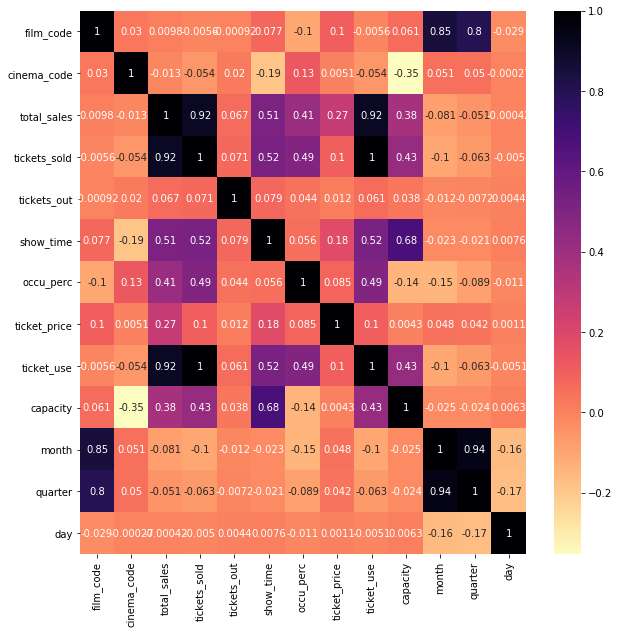

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap='magma_r')
plt.show()

# **Checking For null values**


In [8]:
df.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [9]:
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [11]:
df['capacity'].fillna(df['capacity'].mean(),inplace=True)

In [12]:
df['occu_perc'].fillna(df['occu_perc'].mean(),inplace=True)

In [13]:
df.isna().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

In [14]:
df.drop(['film_code','cinema_code','total_sales','tickets_sold','tickets_out','ticket_use','month','quarter','day'],axis=1,inplace=True)

In [15]:
df

,show_time,occu_perc,ticket_price,capacity,date
0,4,4.26,150000.0,610.328638,2018-05-05
1,5,8.08,80000.0,519.801980,2018-05-05
2,4,20.00,80000.0,160.000000,2018-05-05
3,1,11.01,100000.0,108.991826,2018-05-05
4,3,16.67,80000.0,89.982004,2018-05-05
...,...,...,...,...,...
142519,2,3.86,60000.0,569.948187,2018-11-04
142520,1,65.22,80000.0,22.999080,2018-11-04
142521,3,9.20,132500.0,86.956522,2018-11-04
142522,2,5.00,120000.0,100.000000,2018-11-04


In [16]:
df.corr() 

,show_time,occu_perc,ticket_price,capacity
show_time,1.000000,0.055603,0.176274,0.681474
occu_perc,0.055603,1.000000,0.084631,-0.141262
ticket_price,0.176274,0.084631,1.000000,0.004285
capacity,0.681474,-0.141262,0.004285,1.000000


In [17]:
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [18]:
df_cat

,date
0,2018-05-05
1,2018-05-05
2,2018-05-05
3,2018-05-05
4,2018-05-05
...,...
142519,2018-11-04
142520,2018-11-04
142521,2018-11-04
142522,2018-11-04


In [19]:
df_num

,show_time,occu_perc,ticket_price,capacity
0,4,4.26,150000.0,610.328638
1,5,8.08,80000.0,519.801980
2,4,20.00,80000.0,160.000000
3,1,11.01,100000.0,108.991826
4,3,16.67,80000.0,89.982004
...,...,...,...,...
142519,2,3.86,60000.0,569.948187
142520,1,65.22,80000.0,22.999080
142521,3,9.20,132500.0,86.956522
142522,2,5.00,120000.0,100.000000


In [20]:
le=LabelEncoder()
df_cat['date']=le.fit_transform(df_cat['date'])

In [21]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [22]:
x=df_new.drop(['ticket_price'],axis=1)
y=df_new['ticket_price']

In [23]:
x

,show_time,occu_perc,capacity,date
0,4,4.26,610.328638,54
1,5,8.08,519.801980,54
2,4,20.00,160.000000,54
3,1,11.01,108.991826,54
4,3,16.67,89.982004,54
...,...,...,...,...
142519,2,3.86,569.948187,233
142520,1,65.22,22.999080,233
142521,3,9.20,86.956522,233
142522,2,5.00,100.000000,233


In [24]:
y

0         150000.0
1          80000.0
2          80000.0
3         100000.0
4          80000.0
            ...   
142519     60000.0
142520     80000.0
142521    132500.0
142522    120000.0
142523     50000.0
Name: ticket_price, Length: 142524, dtype: float64

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123)

R2 Score 0.059313145600033534


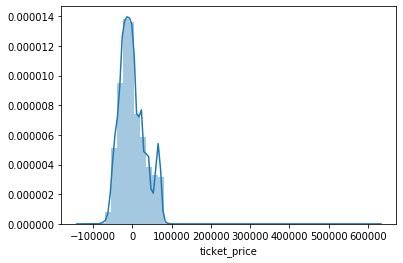

In [26]:
lr= LinearRegression()
lr.fit(xtrain,ytrain)
yhat=lr.predict(xtest)
residual=ytest-yhat
sns.distplot(residual)
print("R2 Score",r2_score(ytest,yhat))

In [27]:
for i in range(2,9):
  pf=PolynomialFeatures(i)
  x_poly=pf.fit_transform(x)
  xtrain,xtest,ytrain,ytest=train_test_split(x_poly,y,test_size=0.3,random_state=123)
  lr= LinearRegression()
  lr.fit(xtrain,ytrain) 
  yhat=lr.predict(xtest)
  print("R2 Score ",i," ",r2_score(ytest,yhat))

R2 Score  2   0.08146289451482258
R2 Score  3   0.11134679973862405
R2 Score  4   0.1186969238365485
R2 Score  5   0.043264282501975115
R2 Score  6   0.061901007336142566
R2 Score  7   -0.17760147676029958
R2 Score  8   0.02131557514964766


R2 Score  8   0.1186969238365485


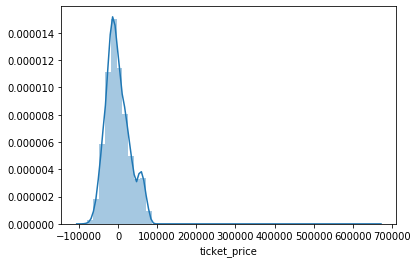

In [28]:
pf=PolynomialFeatures(4)
x_poly=pf.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x_poly,y,test_size=0.3,random_state=123)
lr= LinearRegression()
lr.fit(xtrain,ytrain) 
yhat=lr.predict(xtest)
residuals=ytest-yhat
sns.distplot(residuals)
print("R2 Score ",i," ",r2_score(ytest,yhat))

[10:08:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { base_estinamtor } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


R2 Score  8   0.5723427606785705


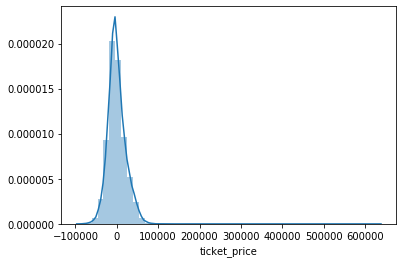

In [29]:
xgb=XGBRegressor(base_estinamtor=LinearRegression())
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123)
xgb.fit(xtrain,ytrain)
yhat=xgb.predict(xtest)
residuals=ytest-yhat
sns.distplot(residuals)
print("R2 Score ",i," ",r2_score(ytest,yhat))